# Exploratory Data Analysis of Online Retail Data
Written by: Usama Qureshi\
Date: 25.09.2023\
Email: usama.qureshi27@gmail.com

## Loading Data

### Importing Libraries

In [171]:
# Importing the required libraries for EDA
import pandas as pd 
import numpy as np 
import seaborn as sns            #visualisation
import matplotlib.pyplot as plt  #visualisation

%matplotlib inline     
sns.set(color_codes=True)

### Loading the data into the data frame

In [172]:
#  Loading the data into the data frame
df = pd.read_excel("Data Files/Online Retail.xlsx")

# To display the top 10 rows 
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Exploring Data 

In [173]:
df.shape

(541909, 8)

In [174]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [175]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [177]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [178]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [179]:
# Finding unique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [180]:
# Total Records
print('Total records(rows) in the dataset : {}'. format(df.shape[0]))
print('Total records(columns) in the dataset : {}'. format(df.shape[1]))

Total records(rows) in the dataset : 541909
Total records(columns) in the dataset : 8


## Cleaning and Validating data

### Formating the columns

In [181]:
# Change the customer id column type into object
df['CustomerID'] = df.CustomerID.astype(str)

In [182]:
# Transform columns name into lower case
df.columns = df.columns.str.lower()
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [183]:
# Separate words using underscore _
df.rename(columns = { 'invoiceno':'invoice_no', 'stockcode':'stock_code', 'invoicedate':'invoice_date', 
                     'unitprice':'unit_price', 'customerid':'customer_id'}, inplace = True)

### Checking and dropping the duplicate rows

In [184]:
df.customer_id

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: customer_id, Length: 541909, dtype: object

In [185]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
df_dedupped = df.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(df_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing customer_id (pk), duplicates : 536641
Number of records in original dataset : 541909


Since both the numbers are different, there are duplicate records in the dataset.

In [186]:
# Calculating duplicates
df.duplicated().sum()

5268

In [187]:
# Removing duplicates
df = df.drop_duplicates()
df.shape

(536641, 8)

### Dealing with missing values

In [188]:
df.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
customer_id        0
country            0
dtype: int64

In [189]:
df.isnull().sum()/len(df)*100 

invoice_no      0.000000
stock_code      0.000000
description     0.270945
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.000000
country         0.000000
dtype: float64

In [190]:
# Droping all the records where description is null
df_index_drop = df[df['description'].isnull()].index
df.drop(index= df_index_drop, inplace=True, axis = 0)

In [191]:
df.isnull().sum()/len(df)*100 

invoice_no      0.0
stock_code      0.0
description     0.0
quantity        0.0
invoice_date    0.0
unit_price      0.0
customer_id     0.0
country         0.0
dtype: float64

Since, the percentange of missing values in customer id is very high, so we can't remove the indexes but to fill it

In [192]:
# Filling all the null values of customer_id with missing
df['customer_id'].fillna('Missing', inplace=True, axis=0)
df.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [193]:
df.shape

(535187, 8)

### Inconsistency Check

Check whether there is inconsistent data / typo error data is present in the categorical columns.

In [194]:
# df.country.nunique() 
df.country.unique() 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [195]:
# Replace country name abbrevation with full name
df['country'] = df['country'].apply(lambda x : x.replace('RSA' , 'South Africa'))
df['country'] = df['country'].apply(lambda x : x.replace('EIRE' , 'Ireland'))

In [196]:
# df.country.nunique() 
df.country.unique() 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'South Africa'], dtype=object)

In [197]:
df.description.nunique() 

4223

In [198]:
# Replace unclear discriptions with not know
df['description'].replace(to_replace = ["?" , "??" , "???", "? sold as sets?" , "?lost" ,"?display?" ,
                                        "?missing", "????missing" , "????damages????"] , value = 'not know', inplace = True)

In [199]:
df.description.nunique() 

4215

In [200]:
# Function to replace stock code with one alphabet abbrevation to atleast three

def replace_stock_code(stock_code):
    
    if stock_code == 'M' :
        return 'MAN'  
    elif stock_code =='D' :
        return 'DISC'
    elif stock_code =='S' :
        return 'SAMP'
    elif stock_code =='C2' :
        return 'CARR'
    elif stock_code =='B' :
        return 'BADDEBT'     
    else :
        return stock_code

# Applying the above fuction to state column

df['stock_code'] = df['stock_code'].apply(replace_stock_code)

The quantity of sold item can't be in negative, so we remove all such doubtfull values

In [201]:
df.shape

(535187, 8)

In [202]:
# Updating dataset with only positive values in quantity
df = df[df['quantity']>0]
df.shape

(525462, 8)

In [203]:
# Updating dataset with only positive values in uni price
df = df[df['unit_price']>0]
df.shape

(524878, 8)

### Detecting Outliers

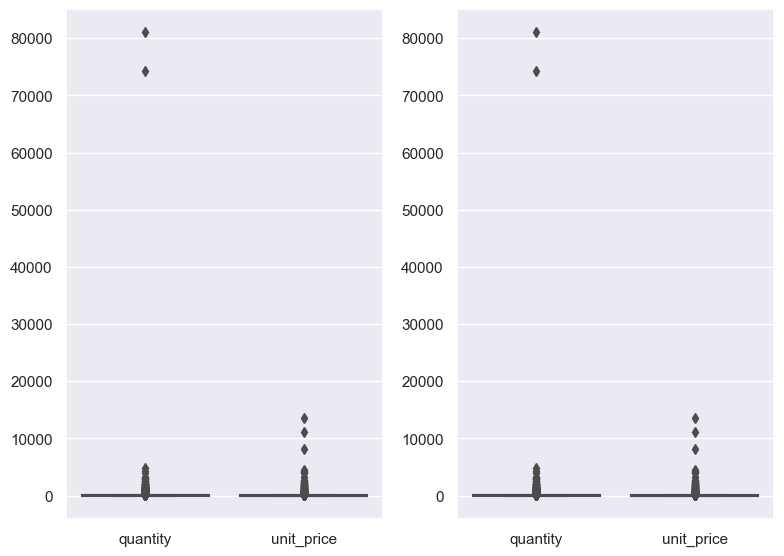

In [204]:
# Creating a boxplot for Outlier detection
features = ['quantity', 'unit_price']
n = 1
plt.figure(figsize=(8,11))
for feature in features:
    plt.subplot(2,2,n)
    sns.boxplot(df[features])
    n+=1
    plt.tight_layout() 

The dataset contain **Outliers.**

In [205]:
df.shape

(524878, 8)

In [206]:
# IQR method
q1 = df.unit_price.quantile(0.25)
q3 = df.unit_price.quantile(0.75)
iqr = q3-q1
outliers = df.unit_price[((df.unit_price < (q1-1.5*iqr)) | (df.unit_price>(q3+1.5*iqr)))] 
outliers

16         9.95
45        18.00
65        10.95
151       14.95
152       14.95
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: unit_price, Length: 37827, dtype: float64

In [207]:
df = df [(df['unit_price'] < (q3+1.5*iqr)) & (df['unit_price']>(q1-1.5*iqr))]
df.shape 

(487051, 8)

In [208]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# df[df['quantity'] > upper_limit]
# df[df['quantity'] < lower_limit]

df = df[(df['quantity'] < upper_limit) & (df['quantity'] > lower_limit)]

df.shape

(460512, 8)

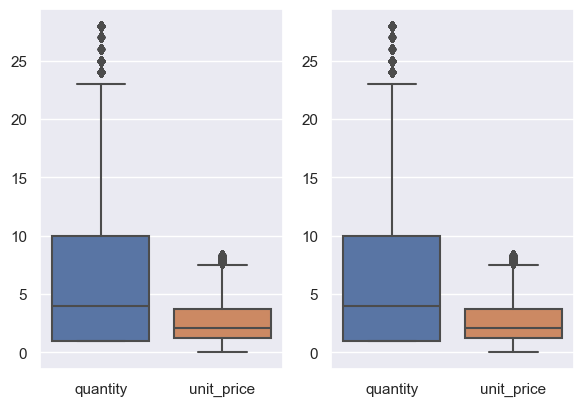

In [209]:
# Creating a boxplot for Outlier detection
features = ['quantity', 'unit_price']
n = 1
plt.figure(figsize=(6,8))
for feature in features:
    plt.subplot(2,2,n)
    sns.boxplot(df[features])
    n+=1
    plt.tight_layout() 

<Axes: ylabel='quantity'>

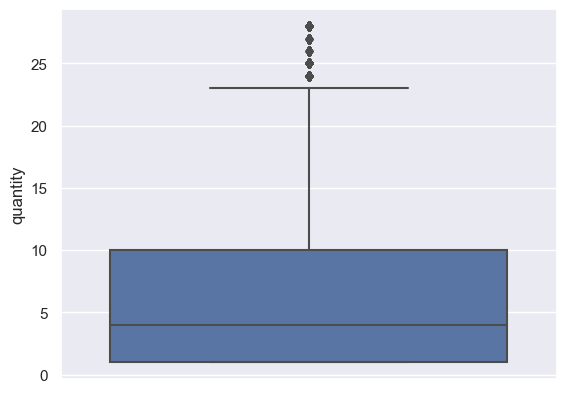

In [210]:
sns.boxplot(y = 'quantity' , data = df)

<Axes: ylabel='unit_price'>

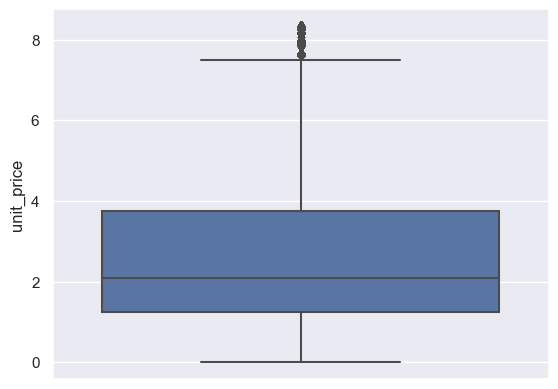

In [211]:
sns.boxplot(y = 'unit_price' , data = df)

### Creating new columns

In [212]:
# Creating a column having day of week
df['day_of_week'] = df['invoice_date'].dt.day_name()
df['day_of_week']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
541904       Friday
541905       Friday
541906       Friday
541907       Friday
541908       Friday
Name: day_of_week, Length: 460512, dtype: object

In [213]:
# Creating a column having month of year
df['month_of_year'] = df['invoice_date'].dt.month_name()
df['month_of_year']

0         December
1         December
2         December
3         December
4         December
            ...   
541904    December
541905    December
541906    December
541907    December
541908    December
Name: month_of_year, Length: 460512, dtype: object

In [214]:
# Creating a column having sale
df['sale'] = df['unit_price']*df['quantity']
df['sale']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: sale, Length: 460512, dtype: float64

<Axes: >

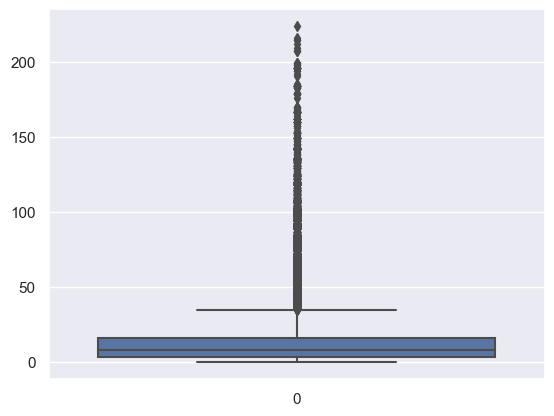

In [215]:
sns.boxplot(df['sale'])

In [216]:
df.shape

(460512, 11)

In [217]:
df.tail(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,day_of_week,month_of_year,sale
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,Friday,December,11.40
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,Friday,December,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,Friday,December,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,Friday,December,30.00
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,Friday,December,70.80
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Friday,December,23.40
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,Friday,December,19.80
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,Friday,December,19.80
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,Friday,December,15.00
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,Friday,December,15.00


In [218]:
# Exporting the Cleaned Customer Demographic Data Set to csv
df.to_csv('Data Files/Online_Retail_Cleaned.csv', index = False)


## Analyzing the data

#### 1. Data visualization to gain insights into the dataset

In [219]:
df.nunique()

invoice_no       18276
stock_code        3697
description       3800
quantity            28
invoice_date     17027
unit_price         285
customer_id       4197
country             38
day_of_week          6
month_of_year       12
sale              1748
dtype: int64

In [220]:
df.dtypes

invoice_no               object
stock_code               object
description              object
quantity                  int64
invoice_date     datetime64[ns]
unit_price              float64
customer_id              object
country                  object
day_of_week              object
month_of_year            object
sale                    float64
dtype: object

Text(0.5, 1.0, 'Maximum business based upon country')

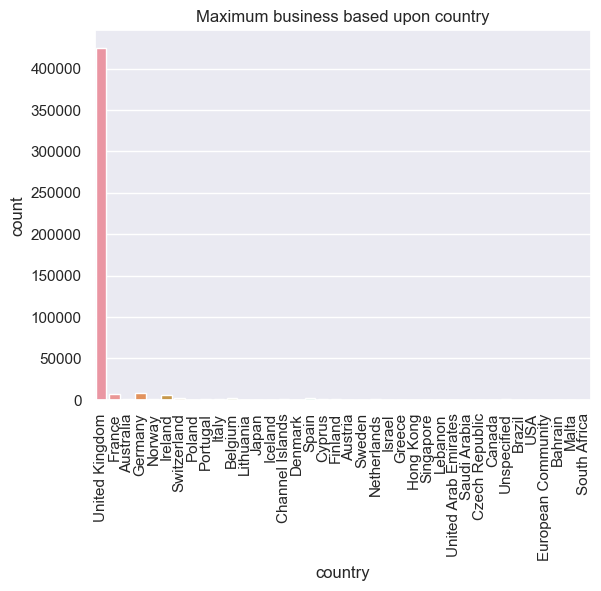

In [221]:
# To visulize the country based upon orders
sns.countplot(data = df , x = "country" )
plt.xticks(rotation = 90)
plt.title('Maximum business based upon country')

In [222]:
# To summerize the top 10 countries orders based upon orders
top_10_country = df['country'].value_counts()[:10]
print(top_10_country)

country
United Kingdom    425038
Germany             7667
France              7192
Ireland             6268
Spain               2123
Belgium             1694
Switzerland         1632
Portugal            1325
Norway               804
Netherlands          653
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation between quantity vs unit price')

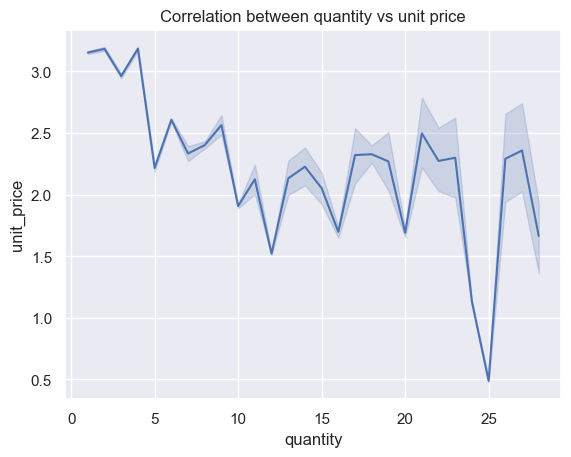

In [223]:
# Correlation between quantity and unit price
sns.lineplot(data = df , x = "quantity" , y = 'unit_price')
plt.title('Correlation between quantity vs unit price')

### 2. Analyze the sales trends over time

Text(0.5, 1.0, 'Maximum business based upon month')

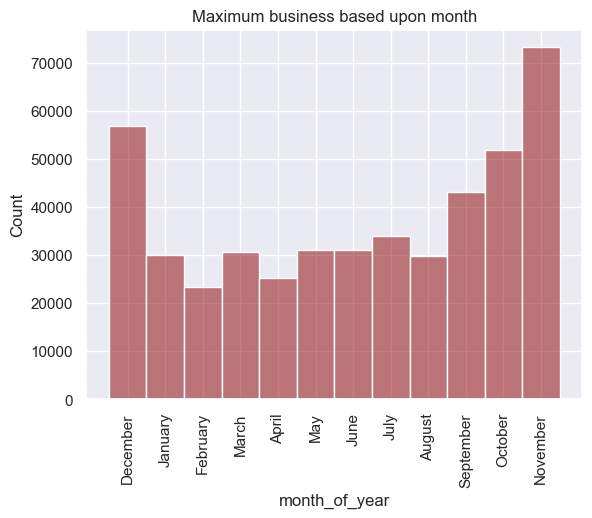

In [224]:
# Identify the busiest months
sns.histplot(data = df , x = 'month_of_year' , color = 'darkred' , bins = 10, alpha = 0.5)
plt.xticks(rotation = 90)
plt.title('Maximum business based upon month')

In [225]:
# Summerize the profitable months
df.groupby('month_of_year')['sale'].sum().sort_values(ascending = False)

month_of_year
November     811647.150
December     646637.960
October      617099.710
September    564038.442
May          400583.700
August       377276.660
July         374513.061
June         364423.420
March        359838.370
January      323270.030
April        295532.661
February     277660.130
Name: sale, dtype: float64

Text(0.5, 1.0, 'Maximum sales based upon month')

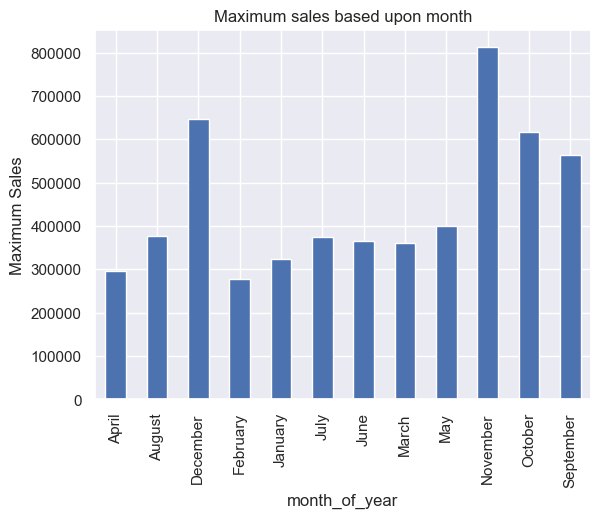

In [226]:
# Identify the profitable months
df.groupby('month_of_year')['sale'].sum().plot(kind='bar')
plt.xticks(rotation = 90)
plt.ylabel('Maximum Sales')
plt.title('Maximum sales based upon month')

Text(0.5, 1.0, 'Week days according to number of orders')

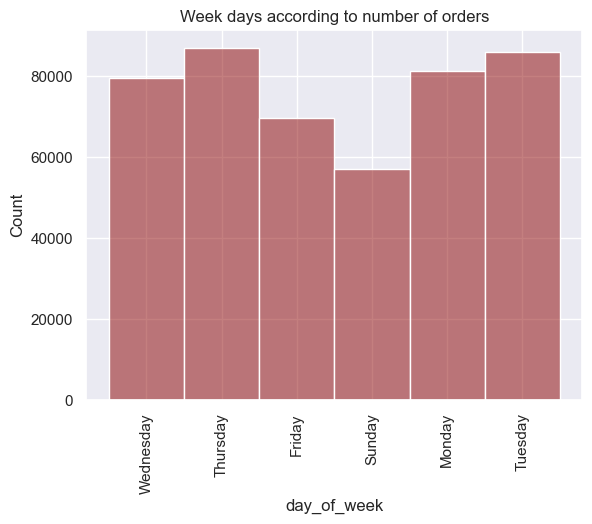

In [227]:
# Identify the busiest day of week
sns.histplot(data = df , x = 'day_of_week'  , bins = 10, color = 'darkred' , alpha = 0.5)
plt.xticks(rotation = 90)
plt.title('Week days according to number of orders')

Text(0.5, 1.0, 'Maximum sales based upon week day')

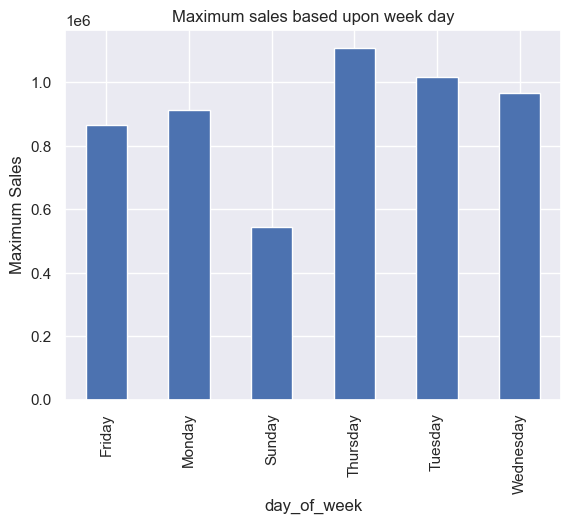

In [228]:
# Identify the profitable days
df.groupby('day_of_week')['sale'].sum().plot(kind='bar')
plt.xticks(rotation = 90)
plt.ylabel('Maximum Sales')
plt.title('Maximum sales based upon week day')

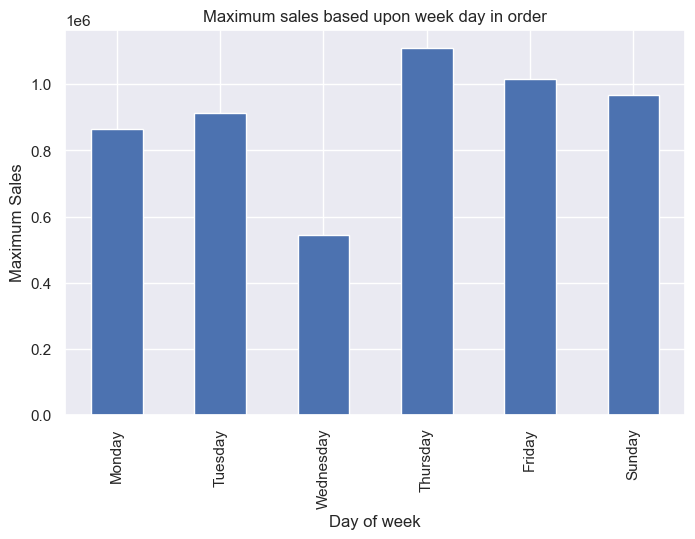

In [229]:
# To arrange the order of days of week from alphabetical order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"]

fig, ax = plt.subplots(1,1,figsize = (8,5))

df.groupby('day_of_week')['sale'].sum().plot(kind='bar')

ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)

ax.set_ylabel('Maximum Sales')
ax.set_xlabel('Day of week')

ax.set_title('Maximum sales based upon week day in order')
plt.show()

In [230]:
# Summerize the profitable days
df.groupby('day_of_week')['sale'].sum().sort_values(ascending = False)

day_of_week
Thursday     1109894.660
Tuesday      1015538.951
Wednesday     966545.820
Monday        912563.711
Friday        864326.591
Sunday        543651.561
Name: sale, dtype: float64

### 3. Explore the top-selling products and countries based on the quantity sold

In [231]:
# Top 10 countries based upon sales
country_based_sales = df.groupby('country')[['sale','quantity']].sum()
country_based_sales.sort_values(by = 'sale' , ascending = False).head(10)

,sale,quantity
country,,
United Kingdom,4735836.254,2476539
Germany,144981.380,84886
France,128661.790,76695
Ireland,124196.170,65435
Switzerland,32918.230,18806
Spain,31316.540,18620
Belgium,28450.240,17856
Portugal,21405.680,12261
Norway,19363.860,9548


In [232]:
# Top 10 country based upon quantity
country_based_quantity = df.groupby('country')[['sale','quantity']].sum()
country_based_quantity['quantity'].nlargest(n=10)

country
United Kingdom    2476539
Germany             84886
France              76695
Ireland             65435
Switzerland         18806
Spain               18620
Belgium             17856
Portugal            12261
Norway               9548
Netherlands          7584
Name: quantity, dtype: int64

Hence, according to both ways, the top countries are same

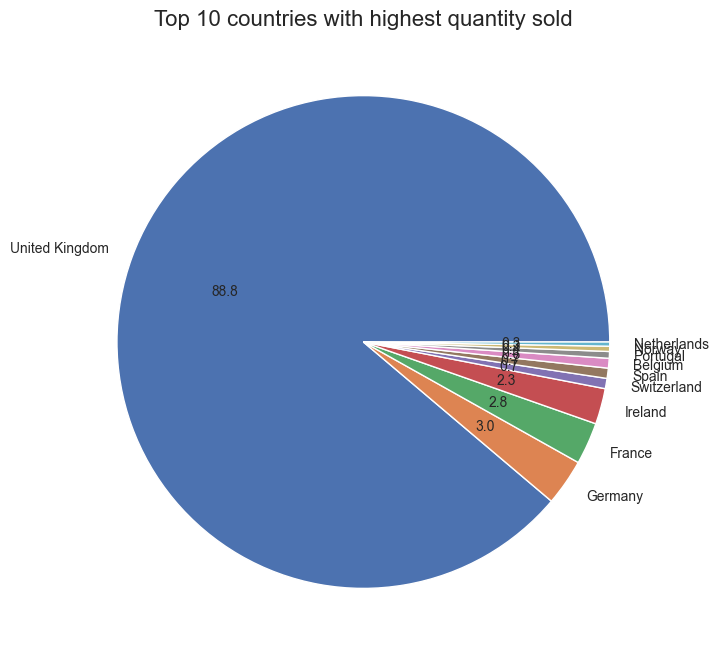

In [233]:
# Visualize top 10 country based upon quantity
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with highest quantity sold', fontsize = 16)
plt.pie (country_based_quantity['quantity'].nlargest(n=10), autopct= '%.1f' , 
         labels = country_based_quantity['quantity'].nlargest(n=10).index , textprops={'fontsize': 10}) 

plt.show()

In [234]:
# Top 10 products based upon sales
product_based_sales = df.groupby('description')[['sale']].sum()
product_based_sales.sort_values(by = 'sale', ascending = False).head(10)

,sale
description,
WHITE HANGING HEART T-LIGHT HOLDER,36682.99
PARTY BUNTING,36665.89
JUMBO BAG RED RETROSPOT,32332.62
JAM MAKING SET WITH JARS,24945.23
ASSORTED COLOUR BIRD ORNAMENT,24929.37
SPOTTY BUNTING,23859.55
PAPER CHAIN KIT 50'S CHRISTMAS,23056.53
HOT WATER BOTTLE KEEP CALM,21490.54
NATURAL SLATE HEART CHALKBOARD,21375.21


<function matplotlib.pyplot.show(close=None, block=None)>

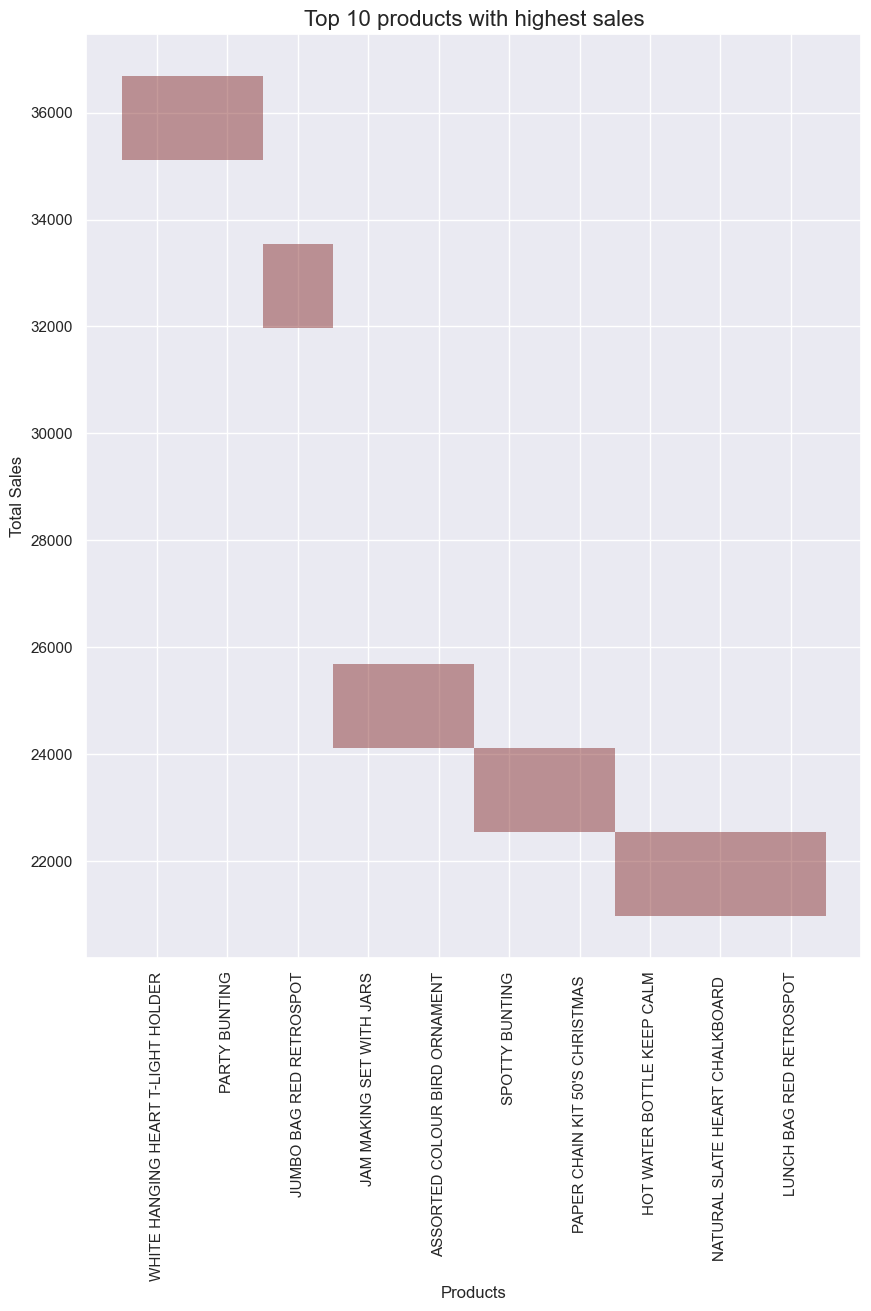

In [235]:
# Visualize top 10 products based upon sales
plt.figure(figsize = (10,12))
plt.title('Top 10 products with highest sales', fontsize = 16)
sns.histplot(data = product_based_sales.sort_values(by = 'sale', ascending = False).head(10) , x = 'description' , y = 'sale' , bins = 10, color = 'darkred' , alpha = 0.5)
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.show

### 4. Identify any outliers or anomalies in the dataset 

The main anomaly found was the negative sale values of any item sold. Hence, this anomaly was removed by applying conditions of only positive values in unit price and quanity values.

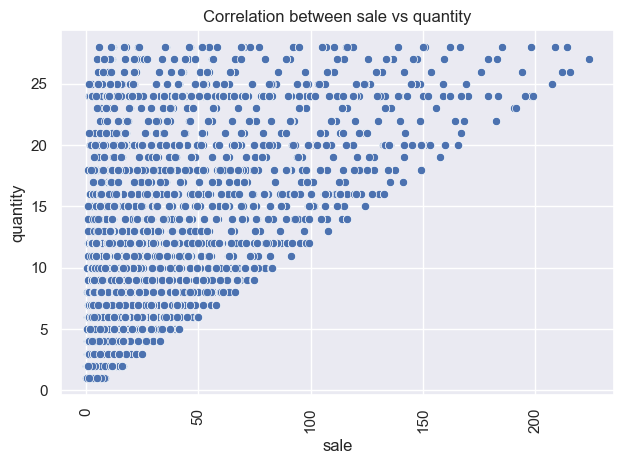

In [236]:
# Correlation between sale and quantity 
sns.scatterplot( x = 'sale'  , y = 'quantity' , data = df )
plt.title('Correlation between sale vs quantity')
plt.xticks(rotation = 90)
plt.tight_layout()

## Findings and Conclusions
#### - Clear and well-supported conclusions that provide meaningful insights into the problem being explored

The top three products with highest sales are WHITE HANGING HEART T-LIGHT HOLDE, PARTY BUNTING, JUMBO BAG RED RETROSPOT.
The least number of orders are on Sunday but data also shows that Sunday is also one of top three overall profitable days of week.
Highest sales are recorded in November.
 
#### - Appropriate recommendations or next steps based on the analysis
According to the analysis result, Thursday, Friday and Sunday are most profitable days. Hence, closing day could be shifted from Saturday to Wednesday.  

#### - A clear explanation of any limitations or areas for further research
Data has lot of null and not available values. Which may cause impact on the final conclusion of analysis.